# Milestone 5: Final Project

### Credit card fraud detection

Credit card fraud is one of the major problems in financial services. This will cost billions of dollars every year. The United States is the most credit card fraud-prone country in the world. During the pandemic, the number of credit transactions and online shopping has increased, and this results in an increase in the number of credit card fraud activities. Fraudsters always work to find new means to conduct fraud in credit card transactions. Losses to financial institutions can be avoided by detecting credit card fraud and alerting banks about potentially fraudulent transactions. With the available credit card fraud dataset, I will perform some graph analysis to understand the dataset. There could be false positive or false negative fraud detection. We may need to perform scaling on the dataset. I will be using machine learning algorithms to detect fraudulent transactions. Companies like Visa are looking to identify new solutions using artificial intelligence to solve credit card fraud. Having a fraud transaction will create a business impact too. Because the customer will be losing the trust in the financial institution. So, credit card companies need to recognize fraud transitions to keep the customers not charged for wrong items and keep them happy. The Kaggle dataset contains transactions that occurred in 2 days in the month of September 2013. There were 492 fraud transactions out of 284,807. The data set contains principal components obtained with PCA. Using the above dataset, I will perform some graph analysis.

<B>Dataset consists of below information:</B>
<Li>Columns V1 to V28 are result of Principal Component Analysis (PCA) which has been done due to data compliance.
<Li>Amount is the Transaction amount
<Li>Class 0 indicates non-fraud and 1 indicates fraud
<Li>Time is the time elapsed between each transaction.


In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score
from sklearn.metrics import classification_report 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from numpy import mean, std
import scikitplot as skplt
from sklearn.metrics import log_loss, average_precision_score, make_scorer

In [2]:
# Read the csv file from the https://www.kaggle.com/mlg-ulb/creditcardfraud
credit_df = pd.read_csv("creditcard.csv")

In [3]:
# Few records of the dataframe
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# The dimension of the dataframe.
credit_df.shape

(284807, 31)

In [5]:
# describe the dataframe.
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Check if any missing values using the isnull function
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Check if any missing values using the isna function
credit_df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
credit_df['Fraud_or_Not']=credit_df['Class']
credit_df['Fraud_or_Not'].replace({1:'Fraud',0:'Not a Fraud'}, inplace = True)

In [9]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Fraud_or_Not
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,Not a Fraud
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,Not a Fraud
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,Not a Fraud
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,Not a Fraud
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,Not a Fraud


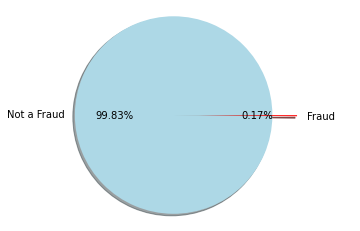

In [10]:
# Graphical Analysis
#Pie chart to check for the percentage of Fraud transactions in the dataframe
Fraud_grouped = credit_df['Fraud_or_Not'].value_counts().reset_index()
Fraud_grouped = Fraud_grouped.rename(columns = {'Fraud_or_Not' : "count", "index" : 'Fraud_or_Not'})

labels = Fraud_grouped['Fraud_or_Not']
sizes = Fraud_grouped['count']
colors = ['#add8e6', '#ff0000']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, explode= (0.25, 0.0),colors=colors)
ax.axis('equal')

plt.show()

There are only 0.17% of transactions in the entire dataset as fraud.

Text(0.5, 1.0, 'Number of Fraud and Non Fraud Transactions')

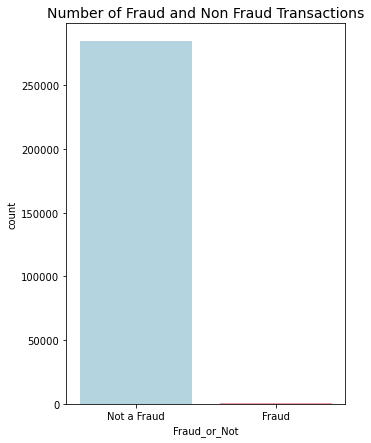

In [11]:
# Bar plot of count of fraud vs non-fraud transactions in the dataset
plt.rcParams['figure.figsize']=[5,7]
sns.countplot('Fraud_or_Not', data=credit_df, palette=['#add8e6','#ff8899'])
plt.title('Number of Fraud and Non Fraud Transactions', fontsize=14)

The Fraud transactions are very minimum when compared to the Not a fraud transactions.

In [12]:
# Save fraud and non-fraud data in different dataframes
fraud_trans_df = credit_df[credit_df.Fraud_or_Not == 'Fraud']
non_fraud_trans_df = credit_df[credit_df.Fraud_or_Not == 'Not a Fraud']

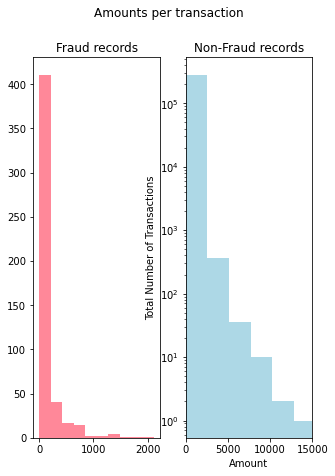

In [13]:
# Historgram with Fraud_or_Not and Amount
f, (ax1, ax2) = plt.subplots(1,2,sharex=False)
f.suptitle('Amounts per transaction')

ax2.hist(non_fraud_trans_df.Amount, color='#add8e6')
ax2.set_title('Non-Fraud records')

ax1.hist(fraud_trans_df.Amount, color='#ff8899')
ax1.set_title('Fraud records')

plt.xlabel('Amount')
plt.ylabel('Total Number of Transactions')
plt.rcParams['figure.figsize']=[10,7]
plt.xlim((0, 15000))
plt.yscale('log')

plt.show()

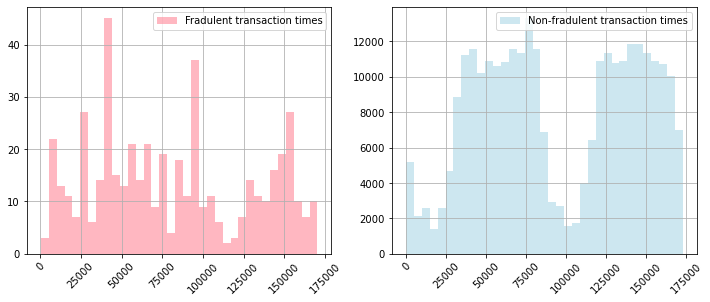

In [14]:
# Histogram of transaction times in fradulent and non-fradulent transactions
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
fraud_trans_df.Time.hist(bins=35, color='#ff8899', alpha=0.6, label="Fradulent transaction times")
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2, 2, 2)
non_fraud_trans_df.Time.hist(bins=35, color='#add8e6', alpha=0.6, label="Non-fradulent transaction times")
plt.xticks(rotation=45)
plt.legend()

Above graphs shows, fradulent transaction has couple of peaks but it can be observed that time of the trasaction cannot be considered in the analysis to determine the transaction is fraudlent.

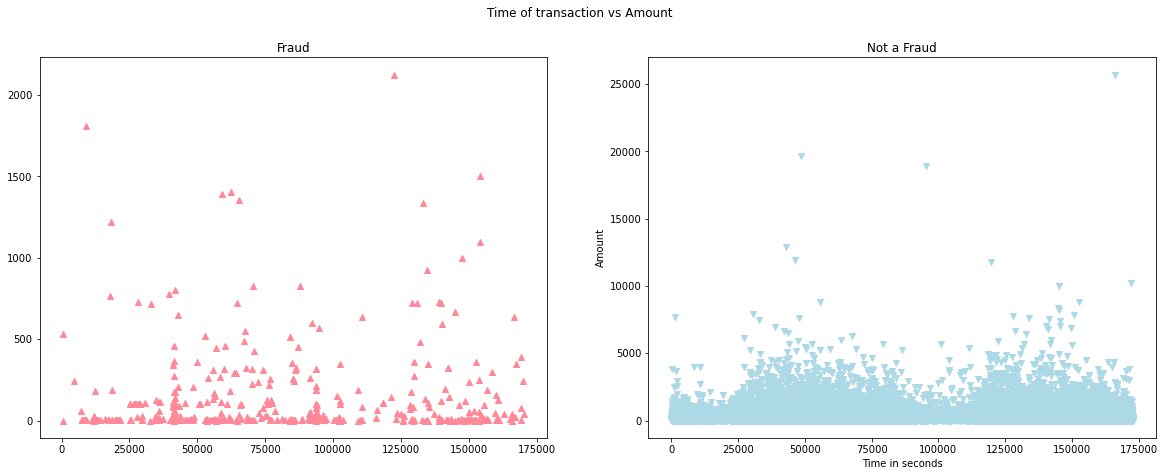

In [55]:
# Scatter plot between the time and Amount
f, (ax1, ax2) = plt.subplots(1, 2, sharex=False)
f.suptitle('Time of transaction vs Amount')

ax1.scatter(fraud_trans_df.Time, fraud_trans_df.Amount, color='#ff8899',marker='^')
ax1.set_title('Fraud')

ax2.scatter(non_fraud_trans_df.Time, non_fraud_trans_df.Amount, color='#add8e6',marker='v')
ax2.set_title('Not a Fraud')

plt.xlabel('Time in seconds')
plt.ylabel('Amount')
plt.rcParams['figure.figsize']=[20,10]
plt.show()

In [16]:
# Renaming the Not a Fraud and Fraud with 0 and 1 respectively. 
credit_df['Fraud_or_Not'].replace({'Not a Fraud': '0', 'Fraud': '1'}, inplace = True)

In [17]:
# Train and test data
X=credit_df.drop(columns=["Time","Class"],axis="columns")
y=credit_df.Class

In [18]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Fraud_or_Not
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [20]:
X_train.shape

(227845, 30)

In [21]:
# Feature selection using Variance Threshold of 0.5 thresold
Variance = VarianceThreshold(threshold=0.5)
Variance.fit(X_train,y_train)
X_train_var=Variance.transform(X_train)
X_test_var=Variance.transform(X_test)

In [22]:
X_train_var.shape

(227845, 23)

In [23]:
# Alternate way to perform feature selection and display the features
def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [24]:
variance_threshold_selector(X_train, 0.5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V14,V15,V16,V17,V18,V19,V20,V21,V22,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,9.99
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,45.90
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,11.99
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,117.44
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,25.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,...,0.600937,0.658885,0.239566,-0.356782,-0.410923,-0.182494,-0.157534,-0.186027,-0.574283,1.98
259178,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,...,0.384625,0.785702,0.057999,-0.462528,-0.063197,0.094703,-0.295730,0.037078,-0.019575,89.23
131932,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,...,-0.019493,0.690200,-0.144778,-0.539887,-0.068375,-0.229614,0.007155,0.052649,0.354089,3.94
146867,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,...,0.927786,-0.090065,0.426113,-0.396148,-0.946837,-1.143752,0.417396,-0.332759,-1.047514,1.00


In [25]:
varth_features=Variance.get_support()
varth_features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False])

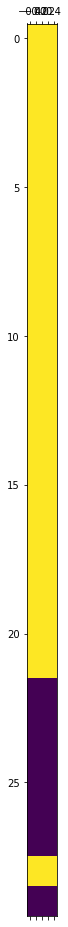

In [26]:
plt.matshow(varth_features.reshape(-1,1))

Variance threshold is calculated based on probability density function of a particular distribution. When a feature has 95% or more variability, then this is very close to zero and the feature may not help in predicting the model. This can be removed. The values with True are the features selected using Variance threshold technique. The columns from V23 to V28 and 30 are removed.

In [27]:
# Feature selection using SelectKBest feature selection
select_10_best = SelectKBest(k=10)
select_10_best.fit(X_train,y_train)
X_train_skbest=select_10_best.transform(X_train)
X_test_skbest=select_10_best.transform(X_test)

C:\Users\mdram\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [28]:
X_train_skbest.shape

(227845, 10)

In [29]:
kbest_features=select_10_best.get_support()
kbest_features

array([False, False,  True,  True, False, False,  True, False, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

In [30]:
# SelectKBest to determine 10 best features
best_10_features = SelectKBest(score_func=f_classif, k=10)
fit = best_10_features.fit(X_train,y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(10,'Score'))         # print 10 best features

C:\Users\mdram\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


    Feature_Name         Score
29  Fraud_or_Not           inf
16           V17  2.724081e+04
13           V14  2.354766e+04
11           V12  1.698553e+04
9            V10  1.109619e+04
15           V16  9.239510e+03
2             V3  8.425516e+03
6             V7  7.782311e+03
10           V11  5.680322e+03
3             V4  4.173023e+03


The values with True are the features selected using SelectKBest technique. Most relevant 10 features are selected. The features selected can be tested by running throught the model.

In [31]:
# calculate precision recall area under curve
def preci_auc(y_true, pred_prob):
   # calculate precision-recall curve
    p, r, _ = precision_recall_curve(y_true, pred_prob)
    # calculate area under curve
    return auc(r, p)

In [32]:
# Evaluate a model
def evaluate_model(X, y, model):
    # Define evaluation procedure
    CV = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # Define the model evaluation the metric
    metric = make_scorer(preci_auc, needs_proba=True)
    # Evaluate model
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=CV, n_jobs=-1)
    return scores

In [33]:
# Define reference model
model = DummyClassifier(strategy='constant', constant=1)

Variance threshold returned 23 features and I'll be using this training and test data for further process

In [34]:
# Evaluate the model
scores = evaluate_model(X_train_var, y_train, model)
# summarize performance
print('Mean area under curve: %.2f (%.2f)' % (mean(scores), std(scores)))

Mean area under curve: 0.50 (0.00)


In [35]:
model

DummyClassifier(constant=1, strategy='constant')

The baseline score is 0.50. Hence the model selected should be atleast above this score.

Since the values are of PCA transformation, it is better to normalize the data as it could impact the performance of the model.

In [36]:
# Normalize the input
scaler = StandardScaler()
scaler.fit(X_train_var)
X_train_norm = scaler.transform(X_train_var)
X_test_norm = scaler.transform(X_test_var)

Model selection - Logistic regression is the common method used. Cross validation method is used to compare the results.

In [37]:
def model_val(X, y, classifier, scor, show):
  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(classifier, X, y, scoring=scor)

  if show == True:
    print("Score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
  
  return scores.mean()

In [38]:
# List of models
model = []
score = []
rfc = RandomForestClassifier()
ctc = DecisionTreeClassifier()
sglc = SGDClassifier()
lr = LogisticRegression()

# Model score added
for classifier in (rfc, ctc, sglc, lr):
    model.append(classifier.__class__.__name__)
    score.append(model_val(X_train_norm, y_train, classifier, scor='roc_auc', show=True))

pd.DataFrame(data=score, index=model, columns=['roc_auc'])

Score: 0.95 (+/- 0.02)
Score: 0.88 (+/- 0.02)
Score: 0.98 (+/- 0.01)
Score: 0.98 (+/- 0.01)


,roc_auc
RandomForestClassifier,0.951464
DecisionTreeClassifier,0.884378
SGDClassifier,0.980817
LogisticRegression,0.977406


Picking Logistic Regression  and RandomForest for comparison.

#### Logistic Regression Model Evaluation

In [39]:
log_grid = GridSearchCV(LogisticRegression(random_state=101, n_jobs=1, max_iter=1000), param_grid={'tol': [0.00001, 0.0001, 0.001,0.01],'C': [1, 50,75, 100]},
                     n_jobs=1, scoring='roc_auc')

In [40]:
log_grid.fit(X_train_norm, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000, n_jobs=1,
                                          random_state=101),
             n_jobs=1,
             param_grid={'C': [1, 50, 75, 100],
                         'tol': [1e-05, 0.0001, 0.001, 0.01]},
             scoring='roc_auc')

In [41]:
pd.DataFrame(log_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.824820,0.478723,0.035602,0.001357,1,1e-05,"{'C': 1, 'tol': 1e-05}",0.985495,0.971779,0.968078,0.981996,0.979681,0.977406,0.006486,1
1,4.046505,0.170298,0.036392,0.004499,1,0.0001,"{'C': 1, 'tol': 0.0001}",0.985495,0.971779,0.968078,0.981996,0.979681,0.977406,0.006486,1
2,3.645913,0.343383,0.037795,0.003549,1,0.001,"{'C': 1, 'tol': 0.001}",0.985495,0.971779,0.968078,0.981996,0.979681,0.977406,0.006486,1
3,3.365404,0.273444,0.033199,0.003545,1,0.01,"{'C': 1, 'tol': 0.01}",0.985495,0.971779,0.968078,0.981996,0.979681,0.977406,0.006486,1
4,3.563201,0.353340,0.034803,0.003123,50,1e-05,"{'C': 50, 'tol': 1e-05}",0.985342,0.971359,0.968207,0.981623,0.979487,0.977204,0.006420,5
5,3.553201,0.293563,0.032004,0.003574,50,0.0001,"{'C': 50, 'tol': 0.0001}",0.985342,0.971359,0.968207,0.981623,0.979487,0.977204,0.006420,5
6,3.678616,0.333160,0.040592,0.015435,50,0.001,"{'C': 50, 'tol': 0.001}",0.985342,0.971359,0.968207,0.981623,0.979487,0.977204,0.006420,5
7,3.855800,0.480484,0.037601,0.006589,50,0.01,"{'C': 50, 'tol': 0.01}",0.985342,0.971359,0.968207,0.981623,0.979487,0.977204,0.006420,5
8,3.796202,0.413183,0.033206,0.007926,75,1e-05,"{'C': 75, 'tol': 1e-05}",0.985341,0.971354,0.968216,0.981621,0.979485,0.977203,0.006418,9
9,4.092203,0.601341,0.036006,0.005179,75,0.0001,"{'C': 75, 'tol': 0.0001}",0.985341,0.971354,0.968216,0.981621,0.979485,0.977203,0.006418,9


In [42]:
clf = log_grid.best_estimator_

In [43]:
print("Best estimator:",log_grid.best_estimator_)
print("Best Params:",log_grid.best_params_)
print("Best classifier score is ",log_grid.best_score_)

Best estimator: LogisticRegression(C=1, max_iter=1000, n_jobs=1, random_state=101, tol=1e-05)
Best Params: {'C': 1, 'tol': 1e-05}
Best classifier score is  0.9774058180842646


#### Test Logistic Regression Model

In [44]:
y_predict_LogReg = clf.predict(X_test_norm)
# Setting the number of decimals based on the samples
decimal_points = np.int64(np.floor(np.log10(len(y_test))))
    
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_predict_LogReg), '\n\n')
    
print('Classification report:')
print(classification_report(y_test, y_predict_LogReg, digits=decimal_points))
    
print('Scalar Metrics')
string_format = '%%s = %%.%if' % decimal_points
if y_test.nunique() <= 2: #binary classification 
    try:
        y_score1 = clf.predict_proba(X_test_norm)[:,1]
    except:
        y_score1 = clf.decision_function(X_test_norm)
    print(string_format % ('AUROC', roc_auc_score(y_test, y_score1)))

Confusion Matrix:
[[56855     9]
 [   40    58]] 


Classification report:
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56864
           1     0.8657    0.5918    0.7030        98

    accuracy                         0.9991     56962
   macro avg     0.9325    0.7958    0.8513     56962
weighted avg     0.9991    0.9991    0.9991     56962

Scalar Metrics
AUROC = 0.9812


Text(0.5, 1.0, 'Confusion Matrix')

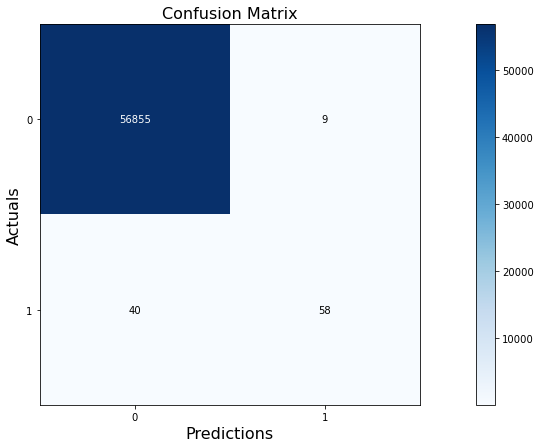

In [45]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predict_LogReg)
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=16)

In [46]:
log_loss(y_test, y_predict_LogReg)

0.02971116252462259

#### Random Forest Model Evaluation

In [47]:
pipeline_randomforest = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

Specifying the number of estimator since the more time taken to process the large dataset.

In [48]:
rf_grid = GridSearchCV(estimator=pipeline_randomforest, param_grid={'model__n_estimators': [70]}, scoring='roc_auc', n_jobs=-1, 
                       pre_dispatch='2*n_jobs', verbose=1, return_train_score=False)

In [49]:
rf_grid.fit(X_train_norm, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.9min finished


GridSearchCV(estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [70]},
             scoring='roc_auc', verbose=1)

In [50]:
pd.DataFrame(rf_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,237.899665,88.558148,0.963446,0.487291,70,{'model__n_estimators': 70},0.953721,0.947984,0.922739,0.96081,0.94822,0.946695,0.012857,1


In [51]:
print("Best estimator:",rf_grid.best_estimator_)
print("Best Params:",rf_grid.best_params_)
print("Best classifier score:",rf_grid.best_score_)

Best estimator: Pipeline(steps=[('model',
                 RandomForestClassifier(n_estimators=70, n_jobs=-1,
                                        random_state=1))])
Best Params: {'model__n_estimators': 70}
Best classifier score: 0.9466948848959305


#### Test Random Forest model

In [52]:
y_predict_RandomForest = rf_grid.predict(X_test_norm)
# Setting the number of decimals based on the samples
decimal_points = np.int64(np.floor(np.log10(len(y_test))))
    
print('Confusion Matrix')
print(confusion_matrix(y_test, y_predict_RandomForest), '\n\n')
    
print('Classification report')
print(classification_report(y_test, y_predict_RandomForest, digits=decimal_points))
    
print('\n Scalar Metrics')
string_format = '%%s = %%.%if' % decimal_points
if y_test.nunique() <= 2: #binary classification 
    try:
        y_score = rf_grid.predict_proba(X_test_norm)[:,1]
    except:
        y_score = rf_grid.decision_function(X_test_norm)
    print(string_format % ('AUROC', roc_auc_score(y_test, y_score)))

Confusion Matrix
[[56862     2]
 [   21    77]] 


Classification report
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     56864
           1     0.9747    0.7857    0.8701        98

    accuracy                         0.9996     56962
   macro avg     0.9872    0.8928    0.9349     56962
weighted avg     0.9996    0.9996    0.9996     56962


 Scalar Metrics
AUROC = 0.9583


Text(0.5, 1.0, 'Confusion Matrix')

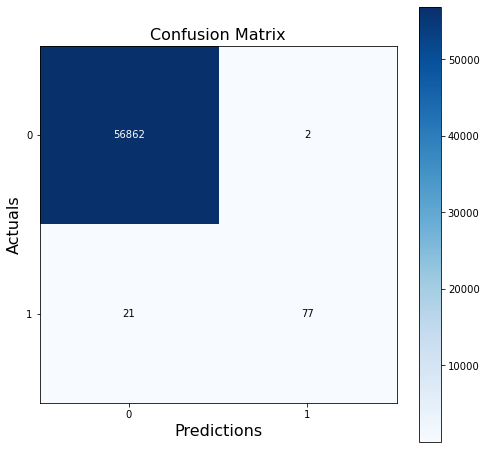

In [53]:
# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predict_RandomForest, figsize=(8, 8))
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix', fontsize=16)

In [54]:
log_loss(y_test, y_predict_RandomForest)

0.013946024652888992

The AUC-ROC (Area Under the Curve – Receiver Operating Characteristic) curve is a performance measurement for the classification problems at various thresholds. Area under the Curve is one of the good metrics to evaluate the score of classifiers. It validated the method identifies if the transaction is a risk or not. Cross validation ROC-AUC scores are identified for different models. The Random Forest classifier score is 95.14. The model is evaluated using the test dataset and AUROC is 95.83 The results can be evaluated by confusion matrix. The confusion matrix helps in identifying if the predictions were correct or not. With higher the values of confusion matrix in the diagonal where predictions are right the better would be the model.

As outlined in the abstract the credit card fraud is one of the issues where financial institutions have gone through many losses. These institutions must identify those fraud and minimize those loses. The AUROC metrics for Random Forest classifier is 95.83%. This will help in identifying the frauds. The log loss is helpful in identifying the better performance of the models in future datasets. The log loss is another metrics used and the score of 0.0139. This model can be used for predicting fraud transactions.